# 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks).

In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

In [2]:
data=pd.read_csv("vehicle-1.csv") # Reading dataset
data.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
325           82         44.0                  63.0         123.0   
744           96         46.0                  88.0         174.0   
562          113         53.0                  93.0         197.0   
460           90         41.0                  62.0         147.0   
406           80         38.0                  64.0         130.0   
464          100         49.0                  80.0         206.0   
69            98         49.0                  84.0         219.0   
73            73         37.0                  53.0         111.0   
172           94         45.0                  81.0         166.0   
177           89         44.0                  72.0         160.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
325                  54.0                        7          151.0   
744                  68.0                       10          155.0   
562                  62.0                       11          216.0   
460                  60.0                        6          128.0   
406                  59.0                        8          134.0   
464                  70.0                        6          183.0   
69                   74.0                        7          190.0   
73                   54.0                        6          126.0   
172                  67.0                        9          145.0   
177                  66.0                        7          144.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
325           45.0                    19.0                        147   
744           43.0                    19.0                        148   
562           31.0                    24.0                        165   
460           52.0                    18.0                        141   
406           51.0                    18.0                        126   
464           35.0                    21.0                        156   
69            34.0                    22.0                        154   
73            55.0                    18.0                        128   
172           46.0                    19.0                        147   
177           46.0                    19.0                        147   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
325            166.0              329.0                      185.0   
744            173.0              354.0                      182.0   
562            221.0              688.0                      196.0   
460            149.0              246.0                      157.0   
406            152.0              259.0                      135.0   
464            206.0              517.0                      198.0   
69             208.0              558.0                      209.0   
73             135.0              227.0                      147.0   
172            164.0              313.0                      179.0   
177            166.0              312.0                      169.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
325                         81.0             3.0               4.0   
744                         69.0            14.0              15.0   
562                         72.0             6.0              25.0   
460                         61.0            13.0               4.0   
406                         76.0             1.0              23.0   
464                         73.0             3.0              13.0   
69                          74.0             4.0               7.0   
73                          82.0             1.0              15.0   
172                         66.0            11.0              14.0   
177                         69.0             NaN               1.0   

     skewness_about.2  hollows_ratio class  
325             179.0            182   bus  
744             194.0            202   van  
562 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

## Inferences:-
### 1.We have 19 attributes and have good amount of data(i.e. about 846 entries) for modelling.
### 2. We have 18 independent variables and 1 dependent variables/target attribute(i.e. class).
### 3.Except class attribute which is of object datatype, all the other attribute columns are having data type as float64 or int64.

In [4]:
data.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

## Inferences:-
### 1.compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2 are approximately normally distributed.
### 2.elongatedness, hollows_ratio are slightly left skewed distribution.
### 3.scatter_ratio, scaled_variance, scaled_variance.1 are slightly right skewed distribution.
### 4. Looking at the count we can say their is missing values in many attributes.

In [5]:
#converting class attribute from object to category
data['class']=data['class'].astype('category')

In [6]:
data.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr.axis_aspect_ratio            float64
max.length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr.axis_rectangularity          float64
max.length_rectangularity         int64
scaled_variance                 float64
scaled_variance.1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration.1     float64
skewness_about                  float64
skewness_about.1                float64
skewness_about.2                float64
hollows_ratio                     int64
class                          category
dtype: object

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 19 columns and 846 Rows.
There are 14 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
radius_ratio                           0               6                0.7   
skewness_about                        77               6                0.7   
circularity                            0               5                0.6   
distance_circularity                   0               4                0.5   
scaled_radius_of_gyration.1            0               4                0.5   
pr.axis_rectangularity                 0               3                0.4   
scaled_variance                        0               3                0.4   
pr.axis_aspect_ratio                   0               2                0.2   
scaled_variance.1                      0               2                0.2   
scaled_radius_of_gyration              0               2                0.2   
scatter_ratio                          0               1                0.1   
elongatedness                          0               1                0.1   
skewness_about.1                      30               1                0.1   
skewness_about.2                       0               1                0.1   

                             Total Zero Missing Values  \
radius_ratio                                         6   
skewness_about                                      83   
circularity                                          5   
distance_circularity                                 4   
scaled_radius_of_gyration.1                          4   
pr.axis_rectangularity                               3   
scaled_variance                                      3   
pr.axis_aspect_ratio                                 2   
scaled_variance.1                                    2   
scaled_radius_of_gyration                            2   
scatter_ratio                                        1   
elongatedness                                        1   
skewness_about.1                                    31   
skewness_about.2                                     1   

                             % Total Zero Missing Values Data Type  
radius_ratio                                         0.7   float64  
skewness_about                                       9.8   float64  
circularity                                          0.6   float64  
distance_circularity                                 0.5   float64  
scaled_radius_of_gyration.1                          0.5   float64  
pr.axis_rectangularity                               0.4   float64  
scaled_variance                                      0.4   float64  
pr.axis_aspect_ratio                                 0.2   float64  
scaled_variance.1                                    0.2   float64  
scaled_radius_of_gyration                            0.2   float64  
scatter_ratio                                        0.1   float64  
elongatedness                                        0.1   float64  
skewness_about.1                                     3.7   float64  
skewness_about.2                                     0.1   float64

In [8]:
data = data.replace(' ', np.nan) #Replacing missing values with nan object.

In [9]:
#Replacing nan object with median of that particular column. 
for i in data.columns[:18]:
    median_value = data[i].median()
    data[i] = data[i].fillna(median_value)

In [10]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 19 columns and 846 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

## Inferences:-
### 1. We have successfully handled missing values.

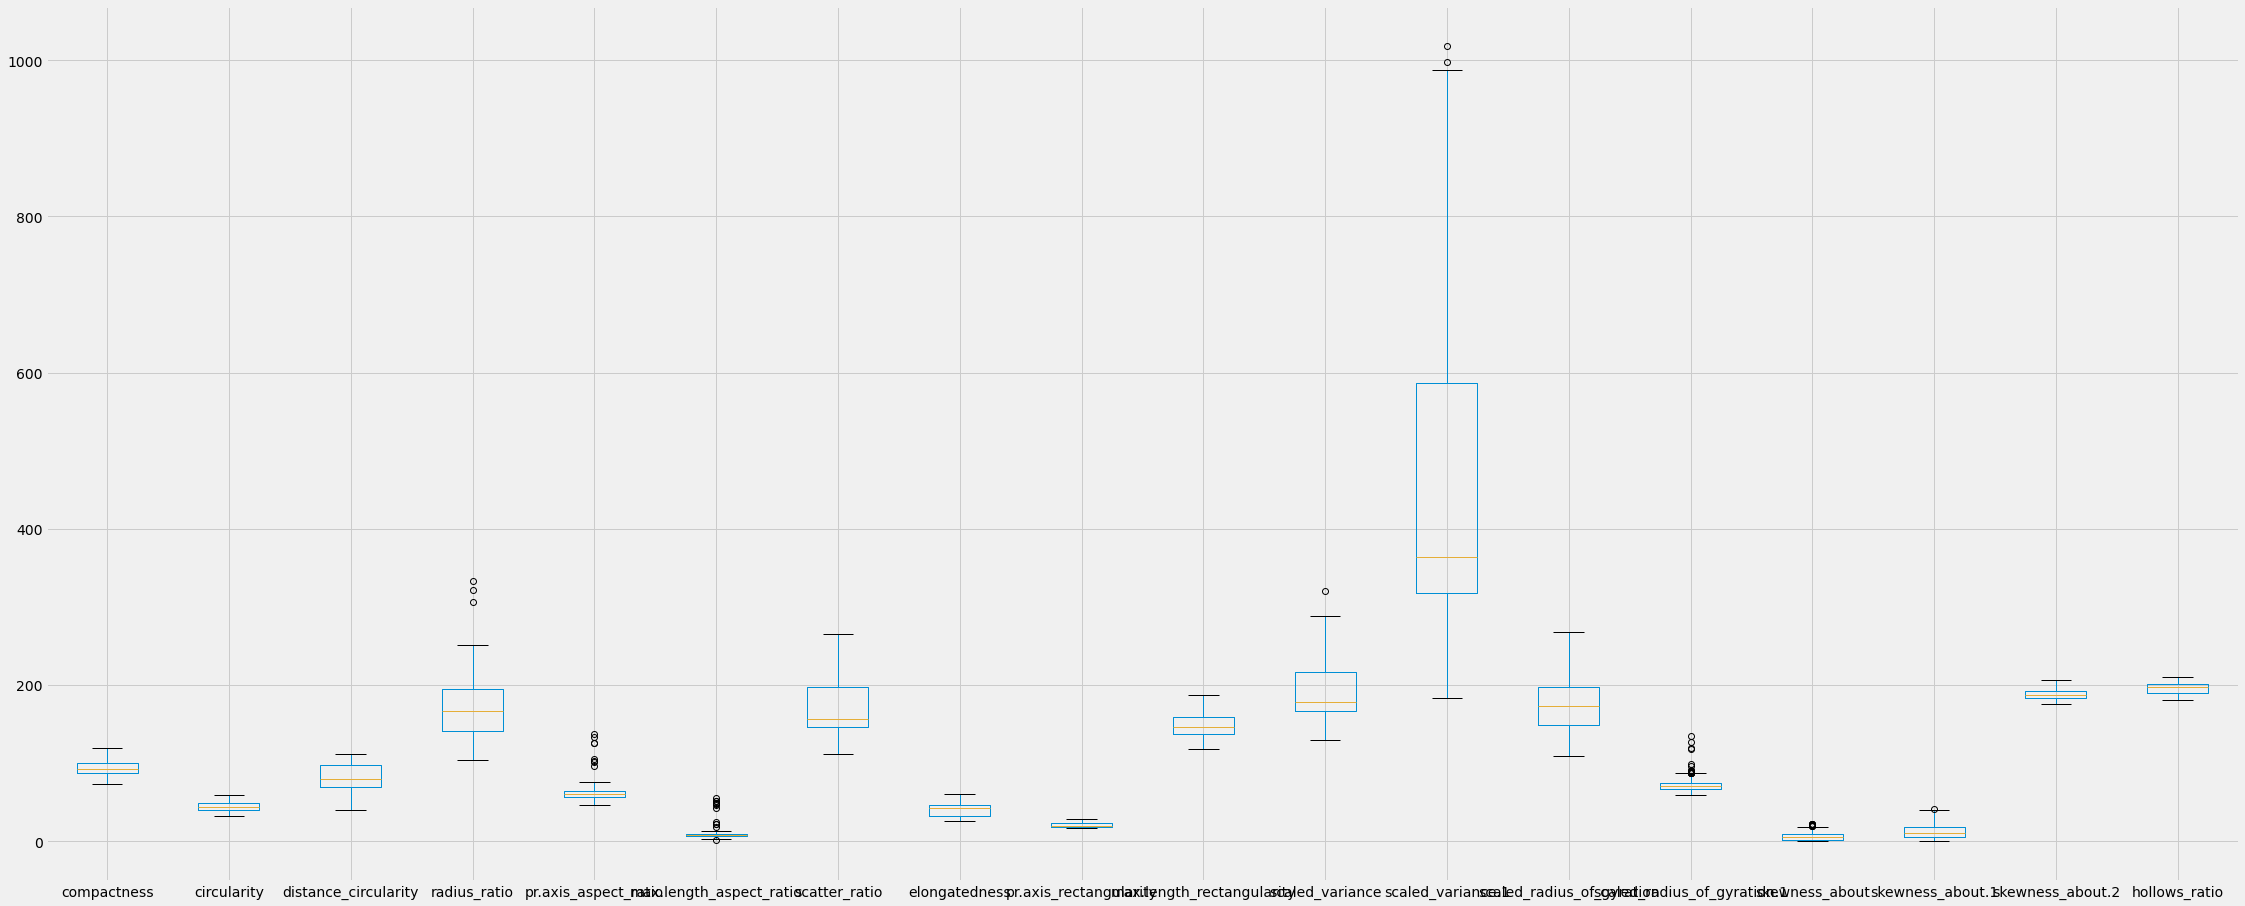

In [11]:
# Checking for spread and outliers in dataset using boxplot
plt.style.use('fivethirtyeight')
data.boxplot(figsize=(35,15))

## Inferences:-
### 1.Outliers are present in following columns such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 .

In [12]:
#Dropping the class attribute
v_df_z=data.drop(['class'],axis=1)

In [13]:
# Standardizing the independent attributes using zscore
from scipy.stats import zscore
v_df_z=v_df_z.apply(zscore)
v_df_z.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
198    -1.540595     0.191843             -0.705587     -1.164555   
46     -0.325470    -0.297502             -0.769150     -1.074685   
624    -1.176057    -1.439306             -0.451332     -0.984815   
558    -1.054545    -0.297502             -1.023405     -1.434164   
195    -0.933032    -0.297502             -1.023405     -1.164555   
490     1.740243     1.496763              1.709832      0.602886   
90      1.254193     1.659878              1.582705      1.591454   
388     0.039068     0.354958              0.184305      4.916638   
547    -0.690007    -0.134387             -0.769150     -0.535466   
467     0.282093     1.496763              1.392014     -0.056160   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
198             -0.720696                -0.340845      -0.478861   
46              -0.847640                -0.123383      -1.172090   
624             -0.847640                -0.558308      -0.870686   
558             -0.974583                -0.340845      -0.569283   
195             -0.720696                -0.340845      -0.509002   
490             -0.593753                 0.529004       1.540544   
90               0.802624                 0.529004       1.480263   
388              9.688661                 8.792575      -0.418581   
547             -0.085979                -0.123383      -0.780265   
467             -0.466810                 0.311542       1.389842   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
198       0.392433               -0.610886                   0.069013   
46        1.289034               -0.997430                  -0.137782   
624       0.904777               -0.997430                  -1.585352   
558       0.648605               -0.610886                  -0.068850   
195       0.392433               -0.610886                  -0.413510   
490      -1.272683                1.708378                   1.792311   
90       -1.272683                1.321834                   1.723379   
388       0.264347               -0.610886                   0.482605   
547       0.648605               -0.997430                  -0.344578   
467      -1.272683                1.321834                   1.861243   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
198        -0.529545          -0.551694                   0.500911   
46         -0.944325          -1.056252                  -0.575117   
624        -0.720982          -0.846492                  -1.128503   
558        -0.625263          -0.653740                   0.009012   
195        -0.370014          -0.563032                  -0.052475   
490         1.289108           1.528899                   1.208015   
90          1.384826           1.494884                   1.669170   
388         4.192571          -0.483664                   0.377936   
547        -0.816700          -0.727439                  -0.052475   
467         1.033858           1.375831                   1.453964   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
198                     1.146352       -0.686013          0.156798   
46                     -0.327326       -1.094148         -0.515420   
624                    -0.193355       -0.481946          2.621595   
558                     1.950176       -1.298215         -0.851529   
195                     1.146352       -0.073812          0.156798   
490                    -0.327326        1.150592          1.165124   
90                     -0.193355       -0.686013         -0.291347   
388                     8.380770        1.150592         -0.403383   
547                    -0.595267        0.130256         -0.515420   
467                     0.342528        1.354659          1.165124   

     skewness_about.2  hollows_ratio  
198         -1.450481      -1.295651  
46           0.175903      -0.219572  
624          0.013265 

In [14]:
floats = v_df_z.columns[v_df_z.dtypes == 'float64']
for x in floats:
    indexNames_larger = v_df_z[ v_df_z[x]>3].index
    indexNames_lesser = v_df_z[ v_df_z[x]<-3].index
    # Delete these row indexes from dataFrame
    v_df_z.drop(indexNames_larger , inplace=True)
    v_df_z.drop(indexNames_lesser , inplace=True)
    data.drop(indexNames_larger , inplace=True)
    data.drop(indexNames_lesser , inplace=True)
v_df_z.sample(3)

compactness  circularity  distance_circularity  radius_ratio  \
731     1.132680     1.170533              1.328450      0.033710   
553    -0.933032     0.028728             -1.023405     -1.284381   
163    -1.054545    -0.786846             -0.642023     -0.894945   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
731             -1.228470                -0.340845       2.022790   
553             -0.593753                -0.123383      -0.629563   
163             -0.339866                -0.775770      -1.111809   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
731      -1.656940                2.094922                   0.827264   
553       0.648605               -0.610886                  -0.206714   
163       1.160948               -0.997430                  -0.896033   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
731         2.086762           2.135503                   2.314787   
553        -0.593357          -0.670747                   0.347193   
163        -0.944325          -1.016568                  -0.759579   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
731                     1.280323       -0.686013          1.165124   
553                     1.816206       -1.298215         -0.627456   
163                    -0.595267       -0.686013         -0.403383   

     skewness_about.2  hollows_ratio  
731         -0.962565      -1.564671  
553         -1.613119      -1.833690  
163          0.338542      -0.085062

## Inference:-
### 1.Removing all columns with z-score greater and lesser than 3 and -3 respectivley as the values are outliers.

In [15]:
print("Shape of original dataset :- ",data.shape)
print("\nShape of modelling dataset :- ",v_df_z.shape)

Shape of original dataset :-  (824, 19)

Shape of modelling dataset :-  (824, 18)


## Inferences:-
### 1. 22 records have been removed as they are outliers.

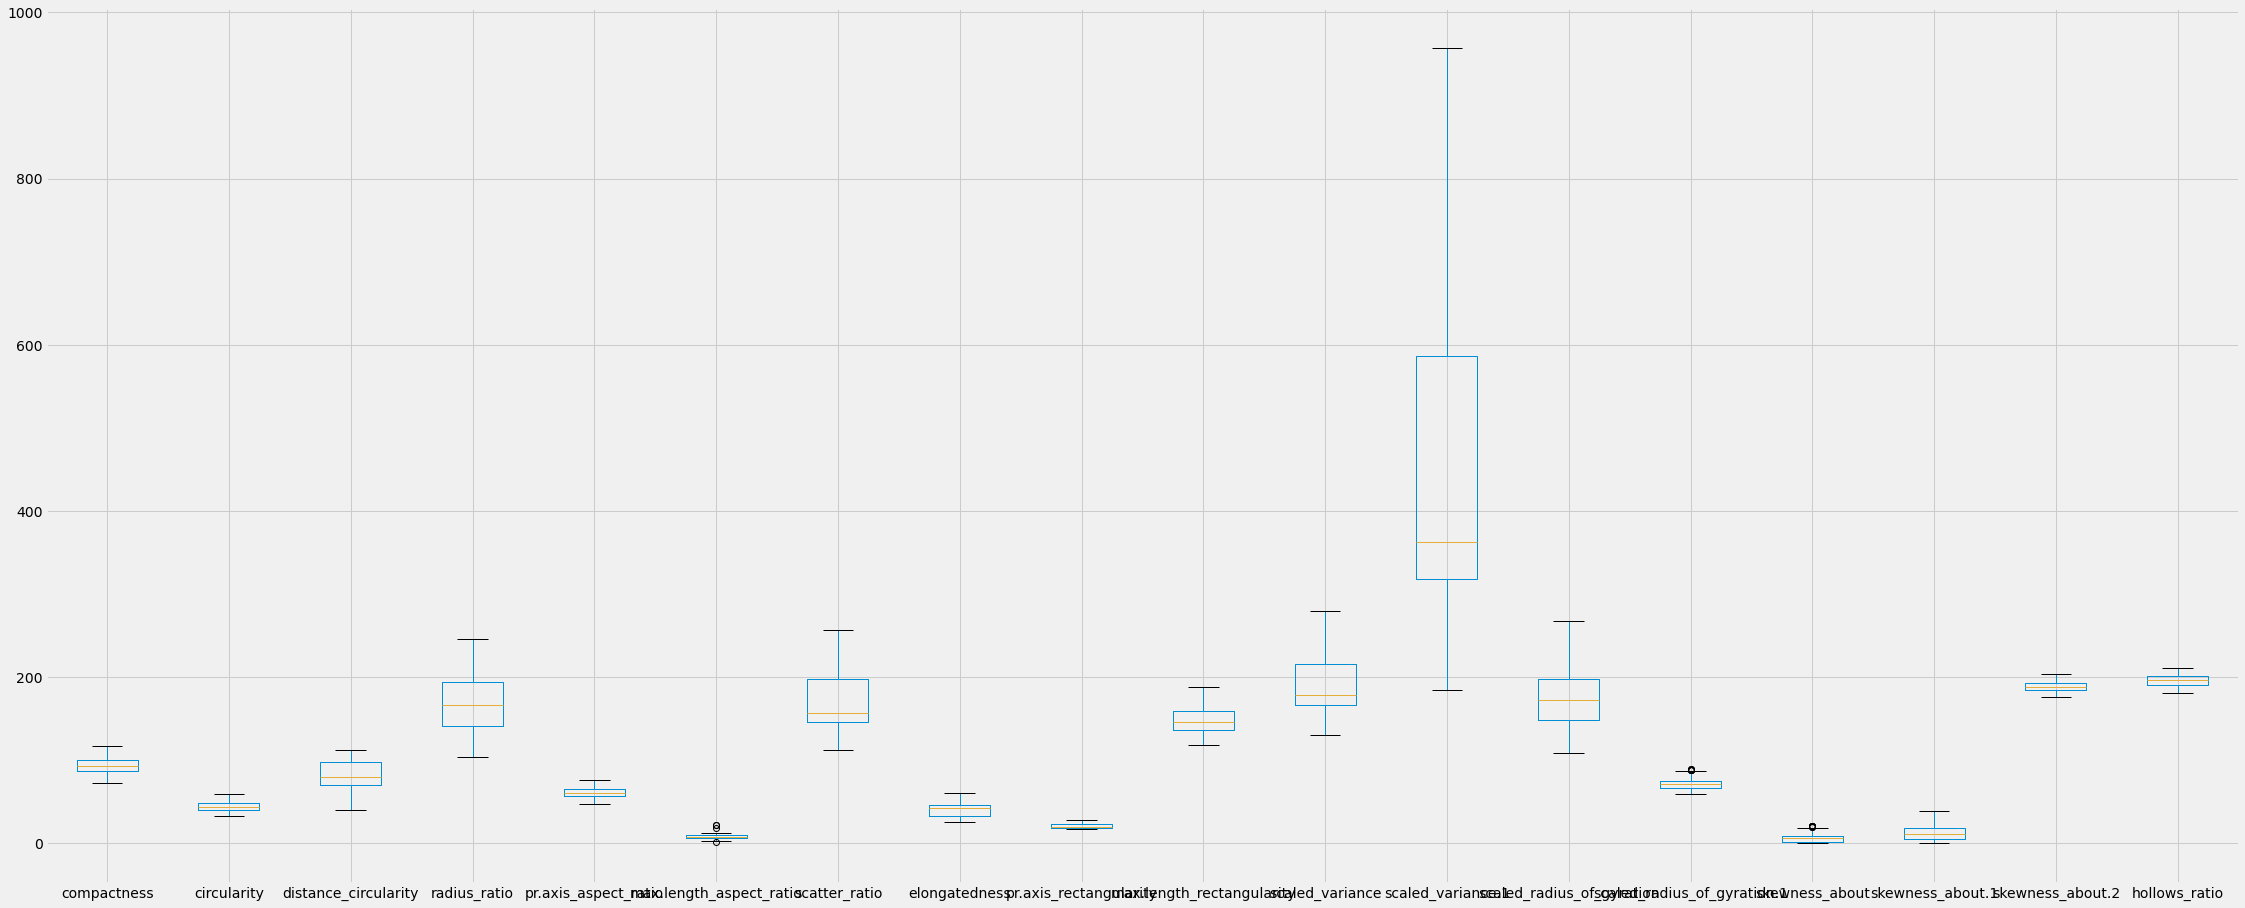

In [16]:
# Checking for outliers again in dataset using boxplot
plt.style.use('fivethirtyeight')
data.boxplot(figsize=(35,15))

## Inferences:-
### 1. All the outliers haven't been removed.

In [17]:
#Handling the remaining outliers by replacing them with median
for col_name in data.columns[:-1]:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    data.loc[(data[col_name] < low) | (data[col_name] > high), col_name] = data[col_name].median()

In [18]:
#Dropping the class attribute
df_new=data.drop(['class'],axis=1)
# Reapplying zscore
from scipy.stats import zscore
v_df_z=df_new.apply(zscore)
v_df_z.sample(10)

compactness  circularity  distance_circularity  radius_ratio  \
820    -0.809906    -1.108104             -0.697335     -1.401857   
527     1.910994     0.697046              1.343887      0.577074   
777     1.539962     1.353464              1.024946     -0.428097   
181    -1.923001    -1.436313             -1.399005     -1.621738   
114    -0.067842    -0.287581              0.195700     -1.087741   
214    -0.562551    -1.436313             -0.633547     -0.836448   
91      0.055835    -1.108104              0.131911     -0.302451   
12     -0.686229     0.204732             -0.505970      0.105900   
343     1.045253     1.517569              1.216310      0.702720   
147    -0.315197    -0.779895             -0.378394      0.105900   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
820             -1.457036                -0.059333      -0.965882   
527             -0.746308                 1.392853       1.159193   
777             -2.523129                -1.995580       2.113937   
181             -0.923990                -1.027457      -1.397057   
114             -1.279354                 0.908791      -0.411515   
214             -0.923990                -0.543395      -0.935084   
91              -1.101672                 0.424729       0.019660   
12               1.208195                -1.027457      -0.503909   
343             -0.568626                 0.908791       1.651964   
147              1.030513                -0.543395      -0.596304   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
820       1.029855               -1.006005                  -1.438198   
527      -1.162579                0.978074                   0.567356   
777      -1.678445                2.168522                   1.120613   
181       1.803656               -1.402821                  -1.645669   
114       0.385022               -0.609189                   0.359885   
214       0.900889               -1.006005                  -1.507355   
91       -0.259812               -0.212374                  -1.230727   
12        0.256055               -0.609189                   0.014100   
343      -1.420512                1.771706                   1.604712   
147       0.385022               -0.609189                  -0.884942   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
820        -0.984128          -0.928989                  -0.911645   
527         0.824993           1.131486                   0.372343   
777         2.533607           2.345590                   1.499746   
181        -1.553666          -1.255863                  -1.663247   
114        -0.448092          -0.497048                  -0.285309   
214        -0.816617          -0.876456                  -1.381396   
91          0.288957          -0.035922                  -0.598477   
12         -0.247079          -0.508722                   0.560243   
343         1.227019           1.703516                   0.904727   
147        -0.615604          -0.607952                  -0.942961   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
820                     0.507681       -1.337932         -0.399104   
527                    -1.132825        1.271946          0.962643   
777                     1.656035       -0.467973          0.508727   
181                     0.999833       -0.685463          0.395248   
114                     0.507681        1.271946          0.054811   
214                     0.015529       -1.120442         -1.306935   
91                     -0.476623        0.619477          0.281769   
12                     -0.148522       -0.250483         -0.172146   
343                    -0.148522        1.489436         -0.739541   
147                    -0.640673       -0.467973          0.508727   

     skewness_about.2  hollows_ratio  
820         -1.298929      -1.313692  
527          0.496358       0.724113  
777         -0.646098 

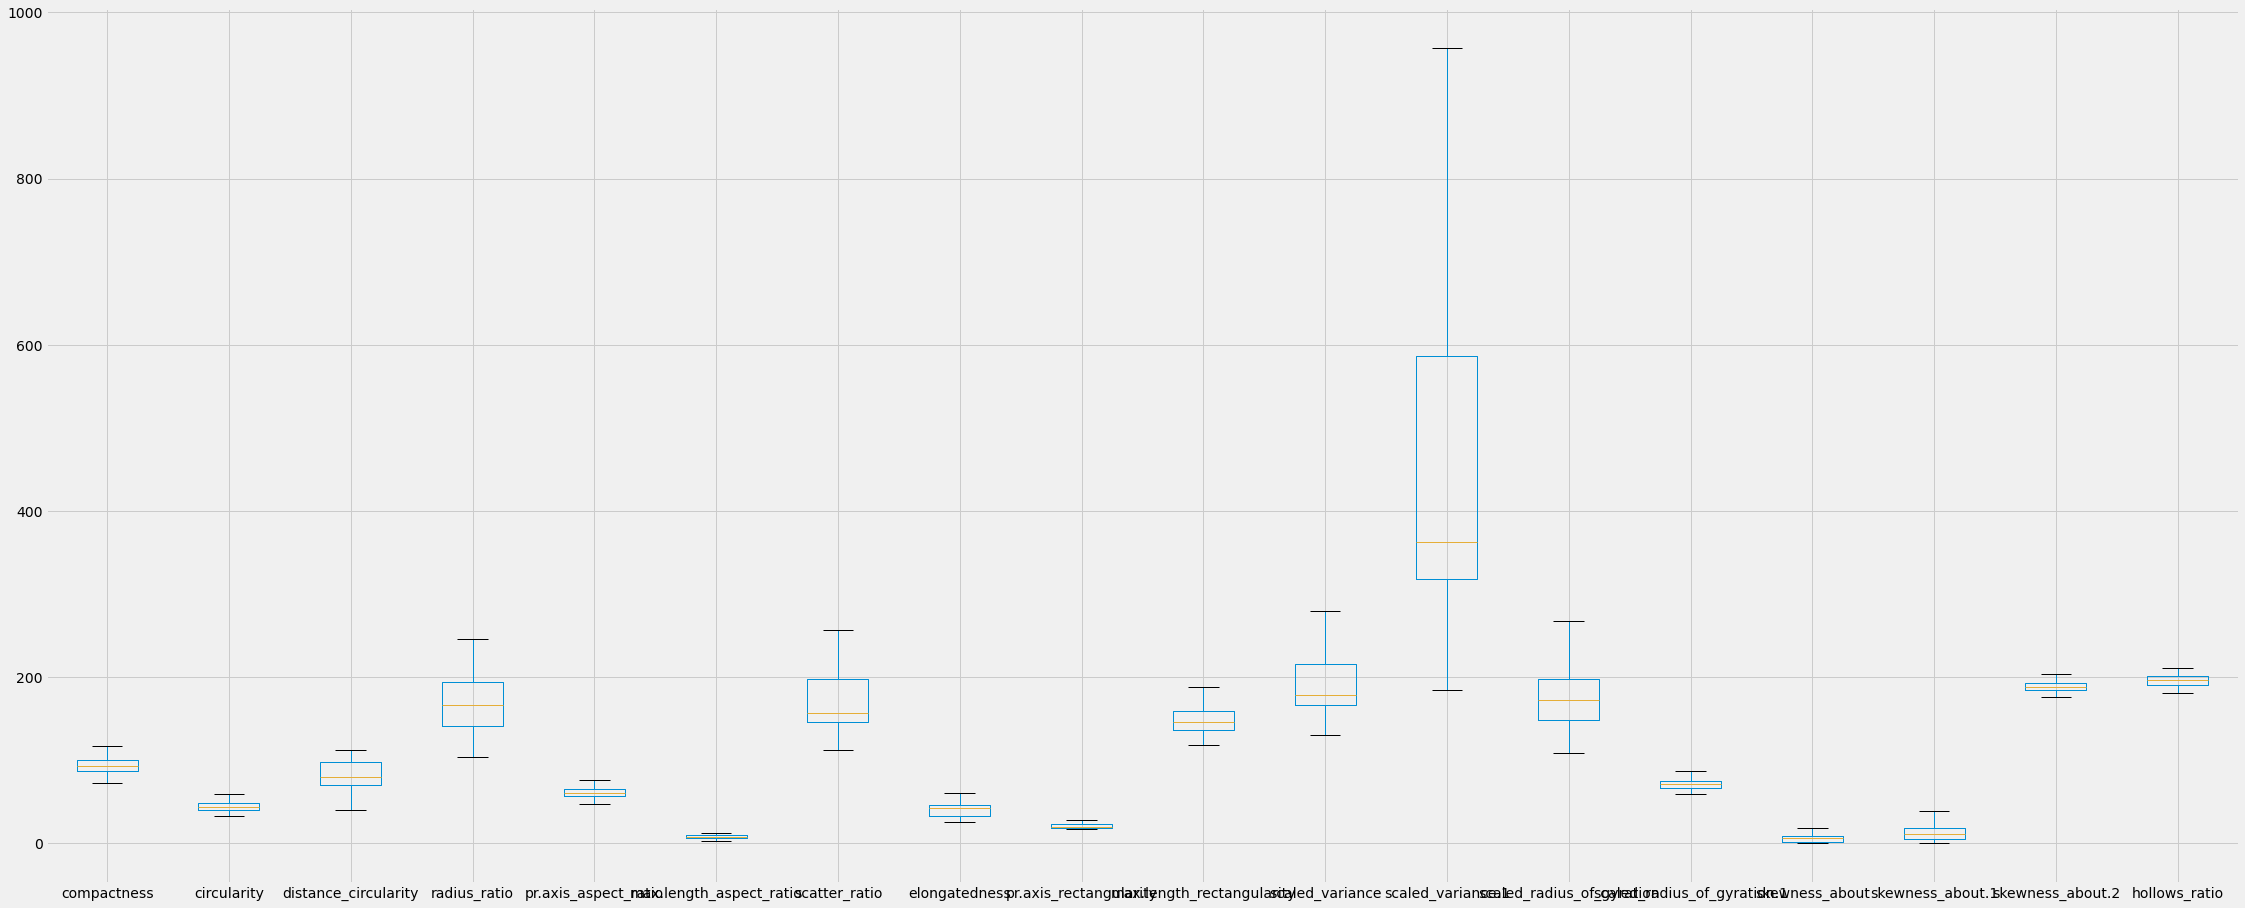

In [19]:
# Checking for outliers again in dataset using boxplot
plt.style.use('fivethirtyeight')
data.boxplot(figsize=(35,15))

## Inferences:-
### 1. We have successfully handled outliers.

In [20]:
data.describe().T

count        mean         std    min    25%  \
compactness                  824.0   93.548544    8.090471   73.0   87.0   
circularity                  824.0   44.752427    6.097377   33.0   40.0   
distance_circularity         824.0   81.932039   15.686409   40.0   70.0   
radius_ratio                 824.0  167.628641   31.854704  104.0  141.0   
pr.axis_aspect_ratio         824.0   61.200243    5.631447   47.0   57.0   
max.length_aspect_ratio      824.0    8.122573    2.067106    3.0    7.0   
scatter_ratio                824.0  168.361650   32.489165  112.0  146.0   
elongatedness                824.0   41.014563    7.758649   26.0   33.0   
pr.axis_rectangularity       824.0   20.535194    2.521591   17.0   19.0   
max.length_rectangularity    824.0  147.796117   14.468626  118.0  137.0   
scaled_variance              824.0  187.375000   29.866880  130.0  167.0   
scaled_variance.1            824.0  436.154126  171.423775  184.0  318.0   
scaled_radius_of_gyration    824.0  174.110437   31.951179  109.0  149.0   
scaled_radius_of_gyration.1  824.0   71.905340    6.099381   59.0   67.0   
skewness_about               824.0    6.151699    4.600708    0.0    2.0   
skewness_about.1             824.0   12.516990    8.817562    0.0    5.0   
skewness_about.2             824.0  188.958738    6.130873  176.0  185.0   
hollows_ratio                824.0  195.669903    7.365333  181.0  191.0   

                                50%    75%    max  
compactness                   93.00  100.0  117.0  
circularity                   44.00   49.0   59.0  
distance_circularity          80.00   98.0  112.0  
radius_ratio                 166.00  194.0  246.0  
pr.axis_aspect_ratio          61.00   65.0   76.0  
max.length_aspect_ratio        8.00   10.0   13.0  
scatter_ratio                157.00  198.0  257.0  
elongatedness                 43.00   46.0   61.0  
pr.axis_rectangularity        20.00   23.0   28.0  
max.length_rectangularity    146.00  159.0  188.0  
scaled_variance              178.00  216.0  280.0  
scaled_variance.1            363.25  586.0  957.0  
scaled_radius_of_gyration    173.00  198.0  268.0  
scaled_radius_of_gyration.1   71.00   75.0   87.0  
skewness_about                 6.00    9.0   19.0  
skewness_about.1              11.00   19.0   39.0  
skewness_about.2             188.50  193.0  204.0  
hollows_ratio                197.00  201.0  211.0

In [21]:
print('Class: \n', data['class'].unique())

Class: 
 [van, car, bus]
Categories (3, object): [van, car, bus]


In [22]:
data['class'].value_counts() # Target value distribution

car    422
bus    210
van    192
Name: class, dtype: int64

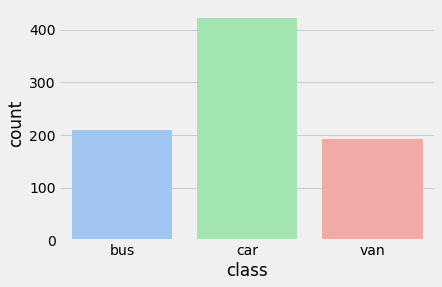

In [23]:
plt.style.use('seaborn-pastel')
sns.countplot(data['class'])

## Inderences:-
### 1.Target class distribution is almost equal between bus and van.
### 2. Car has more value as it contains data of 2 different car models.

In [24]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder #importing the Encoding library
labelencoder_X=LabelEncoder()
data['class']=labelencoder_X.fit_transform(data['class'])
data['class'].unique()

array([2, 1, 0])

## Inference:- 
### 1.Encoded the categorical target column.

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points).

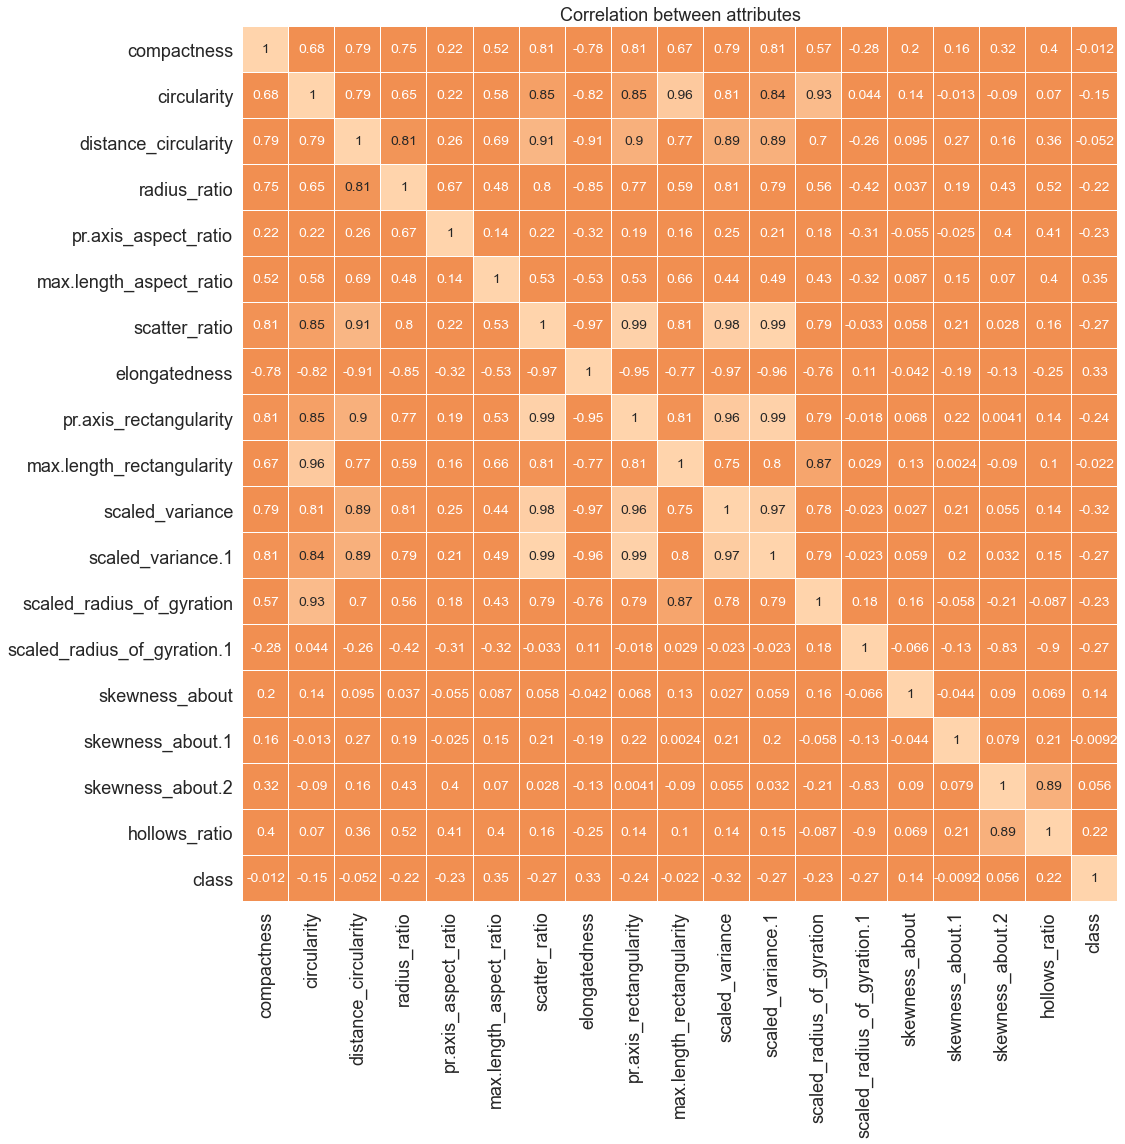

In [25]:
# plotting heatmap of correaltion data.
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(data.corr(),vmin=0.8, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

## Inferences:-
### 1. We can see  lots of highly positively correlated columns and highly negativley correlated columns with each other.
### 2. Class has no correlation with following columns compactness, distance_circularity, max.lenght_rectangularity, skewness_about.1 and skweness_about.2 .

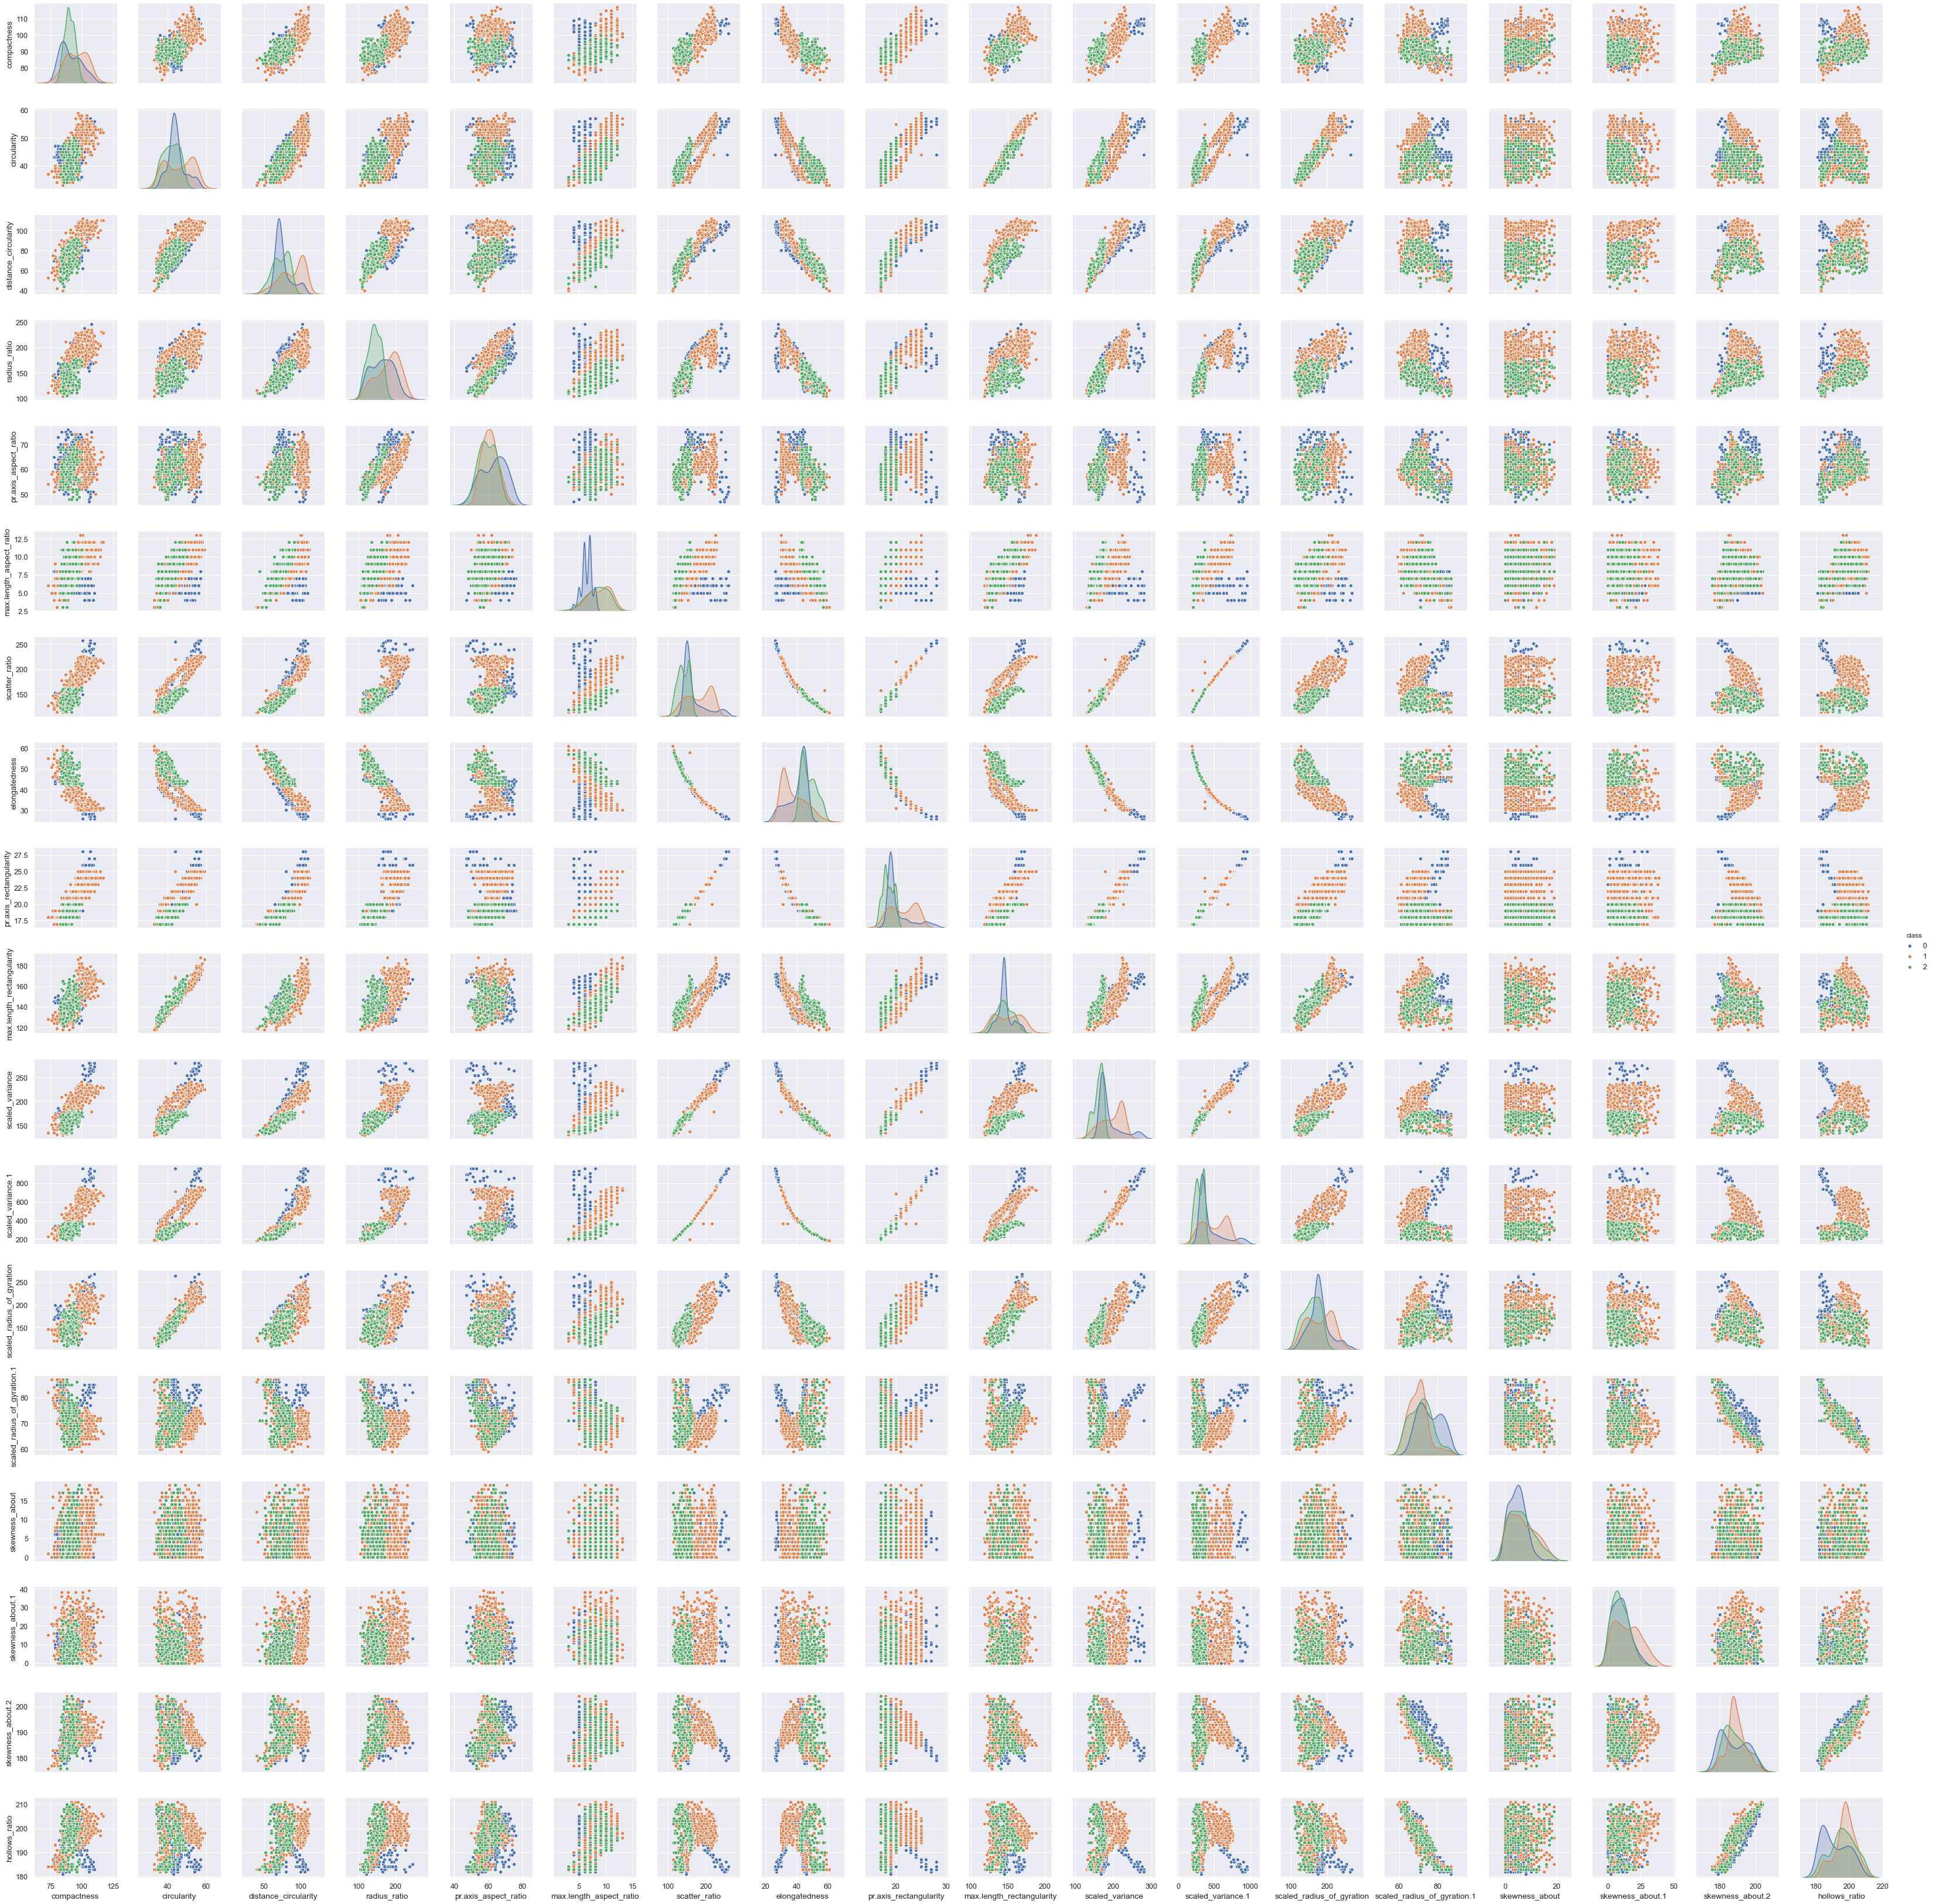

In [26]:
#pairplot
sns.pairplot(data,hue='class')

## Inferences:-
### 1.It is also showing the same information as correlation matrix.
### 2.compactness has positive linear relationship with circularity, distance_circularity, radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance1, scaled_variance. compactness has negative linear relationship with elongatedness.
### 3.circularity has positive linear relationship with distance_circularity, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. circularity has negative linear relationship with elongatedness.
### 4.distance_circularity has positive linear relationship with radius_ratio, scatter_ratio, pr.axis_rectangularity, max.axis_rectangularity, scaled_variance, scaled_variance1, scaled_radius_of_gyration. distance_circularity has negative linear relationship with elongatedness.
### 5.radius_ratio has positive linear relationship with pr.axis_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance1, scaled_radius_of_gyration. radius_ratio has negative linear relationship with elongatedness.

In [27]:
# dropping columns that are not significant for modelling
col = ["compactness","distance_circularity", "max.length_rectangularity", "skewness_about.1", "skewness_about.2"]
new_data = v_df_z.drop(col,axis=1)
new_data.head(2)

circularity  radius_ratio  pr.axis_aspect_ratio  max.length_aspect_ratio  \
0     0.532942      0.325781              1.918924                 0.908791   
1    -0.615790     -0.836448             -0.746308                 0.424729   

   scatter_ratio  elongatedness  pr.axis_rectangularity  scaled_variance  \
0      -0.195927       0.127089               -0.212374        -0.381088   
1      -0.596304       0.513989               -0.609189        -0.582101   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.333611                   0.309709                    -0.312572   
1          -0.619626                  -0.504527                     0.015529   

   skewness_about  hollows_ratio  
0       -0.032993       0.180699  
1        0.619477       0.452406

In [28]:
new_data.shape

(824, 13)

## Inferences:-
### 1. Dropping following columns "compactness","distance_circularity", "max.length_rectangularity", "skewness_about.1" and "skewness_about.2" as they have no correlation with target column.

In [29]:
#Splitting the data into independent and dependent attribute.
X=new_data.iloc[:,0:13]
y = data.iloc[:,18]

# 3. Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (4 marks).

In [30]:
# Splitting X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10, stratify=data['class'] )
print ("Train feature shape : ", X_train.shape) 
print ("\nTest feature shape : ",X_test.shape)

Train feature shape :  (576, 13)

Test feature shape :  (248, 13)


# 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks).

In [31]:
# Model Building : Support Vector Machine without PCA
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Checking the accuracy on the training data
print('Accuracy on Training data: ',svc.score(X_train, y_train))
# Checking the accuracy on the testing data
print('\nAccuracy on Testing data: ', svc.score(X_test , y_test))
#Calculating the recall value 
print('\nRecall value: ',metrics.recall_score(y_test, pred, average='macro'))
#Calculating the precision value 
print('\nPrecision value: ',metrics.precision_score(y_test, pred, average='macro'))
#Confusion Matrix
print("\nConfusion Matrix:\n",metrics.confusion_matrix(pred,y_test))
#Classification Report
print("\nClassification Report:\n",metrics.classification_report(pred,y_test))

Accuracy on Training data:  0.9548611111111112

Accuracy on Testing data:  0.9395161290322581

Recall value:  0.9334400728644551

Precision value:  0.9339772432292116

Confusion Matrix:
 [[ 61   2   2]
 [  1 121   5]
 [  1   4  51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.95      0.95      0.95       127
           2       0.88      0.91      0.89        56

    accuracy                           0.94       248
   macro avg       0.93      0.93      0.93       248
weighted avg       0.94      0.94      0.94       248



In [33]:
resultsDf=pd.DataFrame({'Model':['SVM w/o PCA'],'Accuracy': svc.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  SVM w/o PCA  0.939516

# 5. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data–(10 points).

In [34]:
#Splitting the data into independent and dependent attribute.
X_new=v_df_z
y_new = data.iloc[:,18]

In [35]:
#from scipy.stats import zscore
#X_new=X_new.apply(zscore)
#X_new.sample(10)

In [36]:
# Splitting X and y into training and test set in 70:30 ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y_new, test_size = 0.3, random_state = 10,stratify=y_new)

In [37]:
# Standardizing the independent attributes using StandardScaler for PCA
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit(X_train1)
#Transform X_train
#X_train_std=sc.transform(X_train1)
#Transform X_test ( with same fit as train) to prevent data leak
#X_test_std=sc.transform(X_test1)

## Inferences:-
### 1. All attributes are on same scale.

In [38]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_train1.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 0.95657592  0.67663411  0.76576276  0.74131213  0.23829544  0.51415655
   0.78895299 -0.7701764   0.78902834  0.66033903  0.77274398  0.78913867
   0.56557103 -0.28800765  0.17402813  0.12614937  0.31743472  0.38629895]
 [ 0.67663411  1.00127857  0.78679819  0.64470708  0.21240096  0.58788626
   0.84930675 -0.82039628  0.84449594  0.96966782  0.80771385  0.83803765
   0.92497589  0.02952472  0.13566771 -0.03746359 -0.07987815  0.07836298]
 [ 0.76576276  0.78679819  0.98864397  0.79714969  0.24546441  0.69839079
   0.89410883 -0.89895131  0.88263237  0.7679783   0.87665809  0.87643989
   0.68649814 -0.27208172  0.12579121  0.23651791  0.16743551  0.35544177]
 [ 0.74131213  0.64470708  0.79714969  0.99858601  0.68000021  0.45441079
   0.79058752 -0.840243    0.76845585  0.57858227  0.79957135  0.78003272
   0.55184751 -0.41922054  0.05566149  0.1425621   0.45182954  0.51650813]
 [ 0.23829544  0.21240096  0.24546441  0.68000021  1.00601759  0.11206533
   0.2213467

In [39]:
#Finding eigenvalues amd eigenvectors
eig_vals, eig_vecs =np.linalg.eig(cov_matrix)
print('Eigen Vectors :\n%s',eig_vecs)
print('\nEigen Values :\n%s',eig_vals)

Eigen Vectors :
%s [[ 0.26790786 -0.086144   -0.05851922 -0.02813002 -0.11870923 -0.26418842
  -0.12159088 -0.80549384 -0.33158744 -0.1551276  -0.06575494 -0.00316844
  -0.13210672 -0.11041086 -0.01276803  0.02045321 -0.02192067  0.00659898]
 [ 0.28666423  0.15043355  0.06828842 -0.20264727  0.10797553  0.07552318
   0.37952992 -0.02976358 -0.02512968  0.17607734 -0.11002421 -0.03674582
  -0.1675612   0.20504362 -0.03266662 -0.46991551 -0.34450395  0.48103246]
 [ 0.29974457 -0.03530599 -0.15382761  0.01719905  0.03803077  0.01479809
  -0.1923012   0.28207998 -0.11225415 -0.26750145 -0.76383266  0.23874482
   0.1210693  -0.03553058  0.02255856  0.07633106 -0.14050355 -0.0118129 ]
 [ 0.27482896 -0.19874151  0.23369451  0.13867658 -0.07757536  0.1270778
  -0.16096695  0.05744072 -0.15629294  0.06856815  0.02196829 -0.17632412
  -0.16453839  0.77955066 -0.04154216  0.19081948  0.0709644  -0.1452662 ]
 [ 0.10725311 -0.26222841  0.58260626  0.09585147 -0.03067987  0.6227593
  -0.11509794 -0.

## Inferences:-
### 1. We have 18 Eigen Values.
### 2. We have 9 x 9 Eigen Vectors.

In [40]:
#Finding variance and cummulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
var_exp

[54.945771867888446,
 18.02235387549492,
 6.637023779400292,
 6.289407935546378,
 5.10372338309836,
 3.596192653315336,
 1.8149537999987457,
 1.2681633482834422,
 0.7248072303855416,
 0.45888443425798237,
 0.3431457115341516,
 0.23856804317533864,
 0.1608636195699408,
 0.14698613332350172,
 0.09397687426736752,
 0.07522903570377708,
 0.05635583214565875,
 0.023592442610816194]

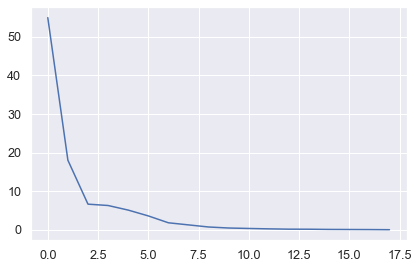

In [41]:
plt.plot(var_exp)

## Inference:-
### 1.We can observe that their is a steep drop in variance explained with increase in number the number of Principal Components. 

In [42]:
cum_var_exp=np.cumsum(var_exp)
print("Cummulative Variannce Explained :\n",cum_var_exp)

Cummulative Variannce Explained :
 [ 54.94577187  72.96812574  79.60514952  85.89455746  90.99828084
  94.59447349  96.40942729  97.67759064  98.40239787  98.86128231
  99.20442802  99.44299606  99.60385968  99.75084582  99.84482269
  99.92005173  99.97640756 100.        ]


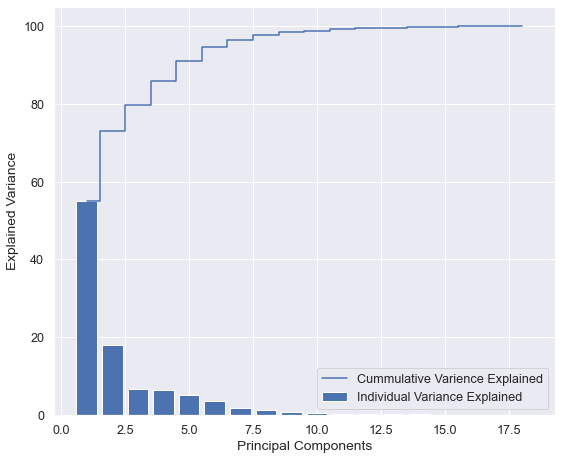

In [43]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1,eig_vals.size+1), var_exp, align='center',label='Individual Variance Explained')
plt.step(range(1,eig_vals.size+1),cum_var_exp,where="mid",label="Cummulative Varience Explained")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

## Inferences:-
### 1.We can visualize and eliminiate last 11 principal components because almost 95% of variance in the data is captured by 6 principal components.

# 6. Train a Support vector machine using the Principal Components and get the accuracy on the test set (10 marks).

In [44]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue by default take first field for sorting
eig_pairs.sort(reverse=True)


# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]

In [45]:
#Dimesionality reduction 

P_reduce = np.array(eigvectors_sorted[0:6]).transpose()   # ~95% of variance is captured using first 6 PC's, which is evident from cummulative variance explained

Proj_train_data = np.dot(X_train1,P_reduce)   # Projecting training data onto the seven eigen vectors

Proj_test_data = np.dot(X_test1,P_reduce)    # Projecting test data onto the seven eigen vectors

In [46]:
Proj_train_data.shape,y_train1.shape,Proj_test_data.shape,y_test1.shape

((576, 6), (576,), (248, 6), (248,))

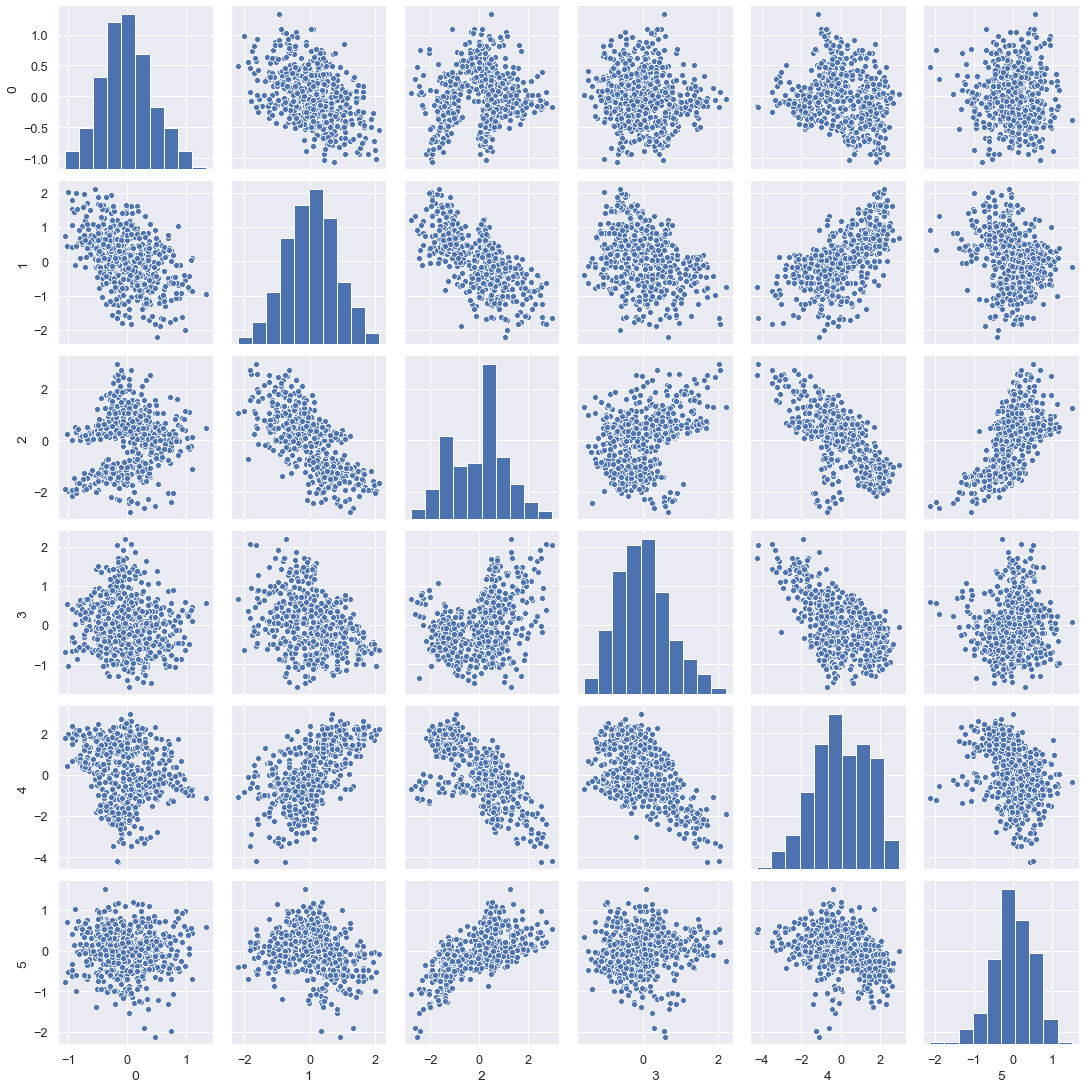

In [47]:
sns.pairplot(pd.DataFrame(Proj_train_data))

## Inferences:-
### 1. Now the independent variables are not corrleated and are truly independednt.

In [48]:
# Model Building : Support Vector Machine with PCA
svc_pca = SVC()
svc_pca.fit(Proj_train_data, y_train1)
pred_pca = svc_pca.predict(Proj_test_data)

In [49]:
# Checking the accuracy on the training data
print('Accuracy on Training data: ',svc_pca.score(Proj_train_data, y_train1))
# Checking the accuracy on the testing data
print('\nAccuracy on Testing data: ', svc_pca.score(Proj_test_data, y_test1))
#Calculating the recall value 
print('\nRecall value: ',metrics.recall_score(y_test1, pred_pca, average='macro'))
#Calculating the precision value 
print('\nPrecision value: ',metrics.precision_score(y_test1, pred_pca, average='macro'))
#Confusion Matrix
print("\nConfusion Matrix:\n",metrics.confusion_matrix(pred_pca,y_test1))
#Classification Report
print("\nClassification Report:\n",metrics.classification_report(pred_pca,y_test1))

Accuracy on Training data:  0.9322916666666666

Accuracy on Testing data:  0.8951612903225806

Recall value:  0.8742563788721812

Precision value:  0.8912486844817672

Confusion Matrix:
 [[ 59   3   4]
 [  2 120  11]
 [  2   4  43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.90      0.92       133
           2       0.74      0.88      0.80        49

    accuracy                           0.90       248
   macro avg       0.87      0.89      0.88       248
weighted avg       0.90      0.90      0.90       248



# 7. Compare the accuracy scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (6 points).

In [50]:
tempResultsDf = pd.DataFrame({'Model':['SVM w/ PCA'],'Accuracy': svc_pca.score(Proj_test_data, y_test1)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1  SVM w/o PCA  0.939516
2   SVM w/ PCA  0.895161

## Inferences:- 
### 1. Accuracy and other performance metrics are lower with PCA data compared to that with scaled data but this is with just 6 dimensions as opposed to 13(after dimensionality reduction).
### 2. Accuracy can further be improved through cross validation and hyper parameter tunning using grid search CV.

# 9. Optional task : clustering.
## a. Apply Kmeans clustering on the principal components train data.Get the cluster labels and append to the same data as a column.Similarly, use the ‘predict’ function of Kmeans clustering to get theclusters on the PC test data and append the cluster labels.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

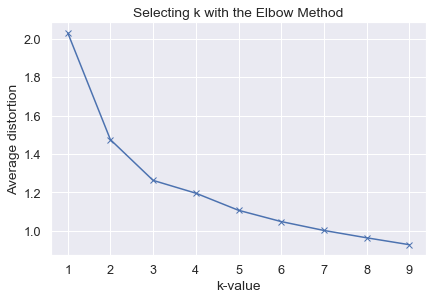

In [51]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Proj_train_data)
    prediction=model.predict(Proj_train_data)
    meanDistortions.append(sum(np.min(cdist(Proj_train_data, model.cluster_centers_, 'euclidean'), axis=1)) / Proj_train_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k-value')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## Inferences:-
### 1. 3 clusters seems optimal when looking into the elbow point.

In [52]:
kmeans_model=KMeans(3)
kmeans_model.fit(Proj_train_data)
prediction=kmeans_model.predict(Proj_train_data)
kmeans_model.fit(Proj_test_data)
prediction_test=kmeans_model.predict(Proj_test_data)

#Append the prediction 
Proj_train_df = pd.DataFrame(Proj_train_data)
Proj_test_df = pd.DataFrame(Proj_test_data)
Proj_train_df["GROUP"] = prediction
Proj_test_df["GROUP"] = prediction_test  
print("Groups Assigned in train dataset : \n")
Proj_train_df.sample(10)

Groups Assigned in train dataset : 



0         1         2         3         4         5  GROUP
512  0.067332 -1.826759  2.728416  2.069120 -3.461899  0.213025      0
503 -0.722653  0.767636 -1.797209 -0.233457  1.167458 -0.603717      1
17   0.335339 -0.391959  0.980745 -0.995871 -0.638327  0.667976      2
381  0.470263 -0.405838  0.523986  0.203992  0.008977  0.726375      2
203 -0.271240 -0.151552  1.257586  0.673085 -1.050655  0.167763      0
310 -0.427077 -0.481849  0.190640  0.588584 -1.568485  0.218642      0
401  0.025721 -0.177207  1.253605  0.726674 -2.199358  0.059104      0
323 -0.289224  0.904751 -1.354862 -0.466493  1.196694 -0.865426      1
428 -0.157353 -0.413810  2.362959  0.238648 -1.842645  0.653493      0
356 -0.003629  0.726962 -1.110773 -0.217265  1.623016 -0.301332      1

In [53]:
print("\nGroups Assigned in test dataset : \n")
Proj_test_df.sample(10)


Groups Assigned in test dataset : 



0         1         2         3         4         5  GROUP
146 -0.661439  1.049152 -0.048115 -0.179851  0.620425  0.358522      1
235 -0.178534  0.663435 -1.429706  0.404516  2.328741 -0.773635      0
138 -0.062730  0.437649 -2.509505  0.794310 -0.249573 -1.723347      0
125  0.721266 -0.110900  0.583628 -0.829399 -0.240576  0.223584      1
94   0.109579  0.277188  0.926694 -1.045933  0.551512  0.443947      1
192 -0.335814 -0.320556 -1.501725 -0.012976  1.582495 -0.498767      0
176 -0.460481 -0.414707  0.468975  0.795514 -1.745201  0.060357      2
26  -0.145746  0.221064  0.136771  0.801968 -1.518059 -0.292074      2
139 -0.312495  0.179775  0.525237  1.650519 -2.038433  0.059017      2
120  0.415864 -0.759718  1.412639 -0.832772 -0.973500  0.330285      1

## b. using this new train and test data (the only difference is that there is a new column with cluster labels), train and evaluate an SVM model.

In [54]:
# Model Building : Support Vector Machine with PCA and K-means clustering
svc_pca_k = SVC()
svc_pca_k.fit(Proj_train_df, y_train1)
pred_pca_k = svc_pca_k.predict(Proj_test_df)

In [55]:
# Checking the accuracy on the training data
print('Accuracy on Training data: ',svc_pca_k.score(Proj_train_df, y_train1))
# Checking the accuracy on the testing data
print('\nAccuracy on Testing data: ', svc_pca_k.score(Proj_test_df, y_test1))
#Calculating the recall value 
print('\nRecall value: ',metrics.recall_score(y_test1, pred_pca_k, average='macro'))
#Calculating the precision value 
print('\nPrecision value: ',metrics.precision_score(y_test1, pred_pca_k, average='macro'))
#Confusion Matrix
print("\nConfusion Matrix:\n",metrics.confusion_matrix(pred_pca_k,y_test1))
#Classification Report
print("\nClassification Report:\n",metrics.classification_report(pred_pca_k,y_test1))

Accuracy on Training data:  0.9340277777777778

Accuracy on Testing data:  0.8830645161290323

Recall value:  0.8574711207076127

Precision value:  0.8841483892634788

Confusion Matrix:
 [[ 58   4   4]
 [  3 120  13]
 [  2   3  41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        66
           1       0.94      0.88      0.91       136
           2       0.71      0.89      0.79        46

    accuracy                           0.88       248
   macro avg       0.86      0.88      0.87       248
weighted avg       0.89      0.88      0.89       248



## c. Write down your comments on the outcome. Whether there is an improvement in the metrics or not, after using the cluster information in our data.

In [56]:
tempResultsDf = pd.DataFrame({'Model':['SVM w/ PCA & K-means'],'Accuracy': svc_pca_k.score(Proj_test_df, y_test1)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

Model  Accuracy
1           SVM w/o PCA  0.939516
2            SVM w/ PCA  0.895161
3  SVM w/ PCA & K-means  0.883065

## Inferences:- 
### 1. There is no improvement in the metrics after using clustering instead we see decrease in performance.
### 2. The reason for decrease in performance can be due to complicated geometric shapes as kmeans does a poor job at clustering data in such situations.